![CoverPageCA2.png](attachment:CoverPageCA2.png)

# *Computer Vision*

You are required to take the pictures that are stored in the Zip file “AnimalFace.zip”, available on Moodle and process the data into a DataFrame. Each animal type is in a separate folder that names the type of animal, and it is suggested that you use this to create the labelled feature of your DataFrame.
You are then required to train and test a classification algorithm that will classify the pictures and determine which class a picture belongs to eg. A picture of a bear face will return “Bear”, a picture of a horse face will return “horse”.
You are then required to source a new picture/pictures of animal faces not included in the data set provided and classify that picture to test your trained model on new data.


In [59]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
import cv2

In [2]:
data_dir = "C:/Users/feran/Downloads/AnimalFace/Image"

In [3]:
image_paths = []
labels = []

In [4]:
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)


    if not os.path.isdir(folder_path):
        continue


    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)


        image_paths.append(file_path)
        labels.append(folder_name)

In [5]:
data = pd.DataFrame({"image_path": image_paths, "label": labels})

In [ ]:
print(data.head())

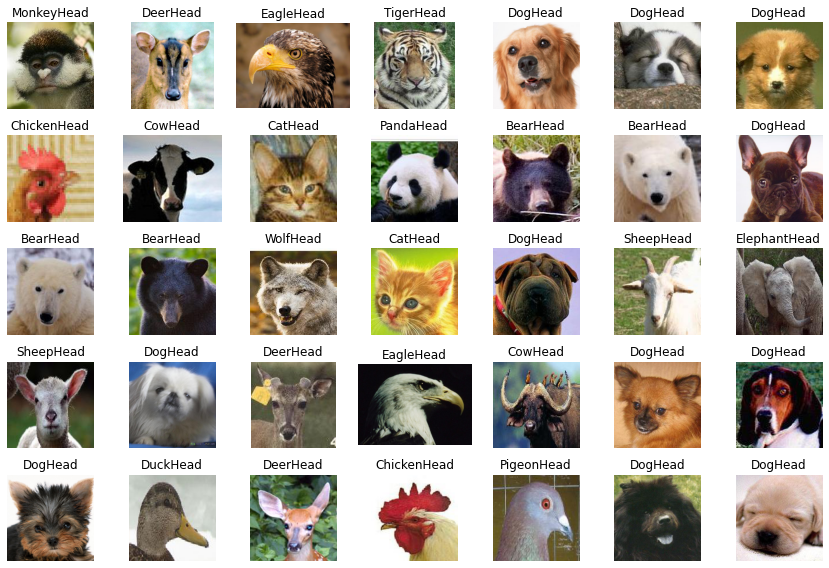

In [6]:
n = 5
m = 7


num_images = n * m


random_indices = random.sample(range(len(image_paths)), num_images)


fig, axs = plt.subplots(n, m, figsize=(12, 8))


for i, index in enumerate(random_indices):

    row = i // m
    col = i % m

    # Load and display the image
    image = mpimg.imread(image_paths[index])
    axs[row, col].imshow(image)
    axs[row, col].axis('off')
    axs[row, col].set_title(labels[index])
    
    #axs[row, col].text(0.05, 0.95, labels[index], transform=axs[row, col].transAxes,
    #                   color='white', fontsize=12, fontweight='bold',
    #                   verticalalignment='top', bbox={'facecolor': 'black', 'alpha': 0.8})


plt.tight_layout()
    

plt.show()

In [7]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [8]:
pca = RandomizedPCA(n_components=500, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc) 

In [9]:
from sklearn.model_selection import train_test_split
X_train_paths, X_test_paths, y_train, y_test = train_test_split(image_paths, labels, random_state=42)

In [10]:
X_train = []
for img_path in X_train_paths:
    image = Image.open(img_path)

    image = image.convert("L")
 
    image = image.resize((300, 300))
    
    image_array = np.array(image)



    feature_vector = image_array.flatten()
    

    X_train.append(feature_vector)

In [11]:
X_test = []
for img_path in X_test_paths:
    image = Image.open(img_path)

    image = image.convert("L")

    image = image.resize((300, 300))
    
    image_array = np.array(image, dtype=object)

    feature_vector = image_array.flatten()
    
    X_test.append(feature_vector)

In [12]:
model = SVC(kernel='rbf', C=1E10)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
yfit = model.predict(X_test) 

In [ ]:
n = 5 
m = 7 

num_images = n * m

# Randomly select image indices
random_indices = random.sample(range(len(X_test)), num_images)

fig, axs = plt.subplots(n, m, figsize=(12, 8))

for i, index in enumerate(random_indices):

    row = i // m
    col = i % m
  
    image = mpimg.imread(X_test_paths[index])
    axs[row, col].imshow(image)
    axs[row, col].axis('off')
    #axs.set(xticks=[], yticks=[])
    #axs.set_ylabel(labels_names[yfit[i]].split()[-1],
    axs[row, col].set_title(yfit[index],
        color='black' if yfit[index] == y_test[index] else 'red')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
 xticklabels=labels,
 yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label'); 

In [13]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

Model = model

grid_search = GridSearchCV(model, param_grid, cv=5)



In [15]:
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    

In [17]:
new_model = SVC(C=loaded_model.C, kernel=loaded_model.kernel, gamma=loaded_model.gamma)

new_model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [ ]:
#%time grid_search.fit(X_train, y_train)
#print(grid_search.best_params_) 

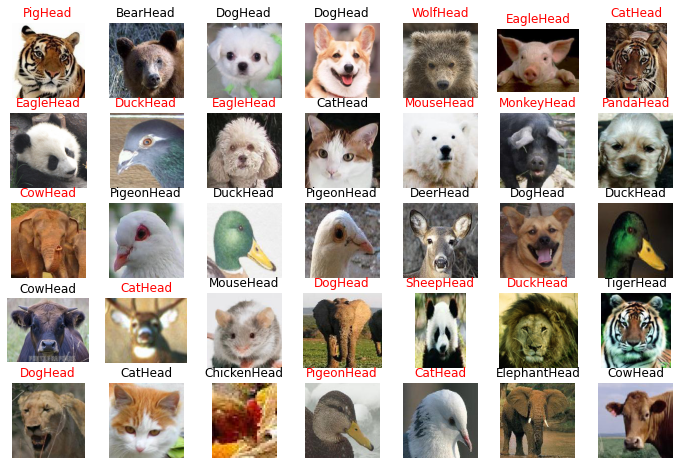

In [18]:
yfit = new_model.predict(X_test)

n = 5
m = 7 


num_images = n * m


random_indices = random.sample(range(len(X_test)), num_images)

fig, axs = plt.subplots(n, m, figsize=(12, 8))

for i, index in enumerate(random_indices):

    row = i // m
    col = i % m
  
    image = mpimg.imread(X_test_paths[index])
    axs[row, col].imshow(image)
    axs[row, col].axis('off')
    #axs.set(xticks=[], yticks=[])
    #axs.set_ylabel(labels_names[yfit[i]].split()[-1],
    axs[row, col].set_title(yfit[index],
        color='black' if yfit[index] == y_test[index] else 'red')


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

    BearHead       0.31      0.50      0.39        22
     CatHead       0.36      0.43      0.40        46
 ChickenHead       0.57      0.46      0.51        28
     CowHead       0.38      0.47      0.42        32
    DeerHead       0.52      0.50      0.51        28
     DogHead       0.37      0.52      0.44        94
    DuckHead       0.39      0.25      0.30        28
   EagleHead       0.33      0.54      0.41        26
ElephantHead       0.55      0.39      0.45        31
   HumanHead       0.80      0.70      0.74        23
    LionHead       0.00      0.00      0.00        35
  MonkeyHead       0.29      0.40      0.33        20
   MouseHead       0.20      0.19      0.20        21
     Natural       0.00      0.00      0.00         2
   PandaHead       0.93      0.86      0.89        29
     PigHead       0.31      0.47      0.37        17
  PigeonHead       0.25      0.22      0.23        32
  RabbitHead       0.44    

In [ ]:
best_model = grid_search.best_estimator_

In [27]:
with open('best_model2.pkl', 'wb') as file:
    pickle.dump(new_model, file)

In [20]:
new_data_dir = "C:/Users/feran/Desktop/AnimalTest"

new_image_paths = []
new_labels = []

for folder_name in os.listdir(new_data_dir):
    new_folder_path = os.path.join(new_data_dir, folder_name)


    if not os.path.isdir(new_folder_path):
        continue


    for file_name in os.listdir(new_folder_path):
        file_path = os.path.join(new_folder_path, file_name)
        #print(file_path)


        new_image_paths.append(file_path)
        new_labels.append(folder_name)

new_data = pd.DataFrame({"new_image_path": new_image_paths, "new_label": new_labels})

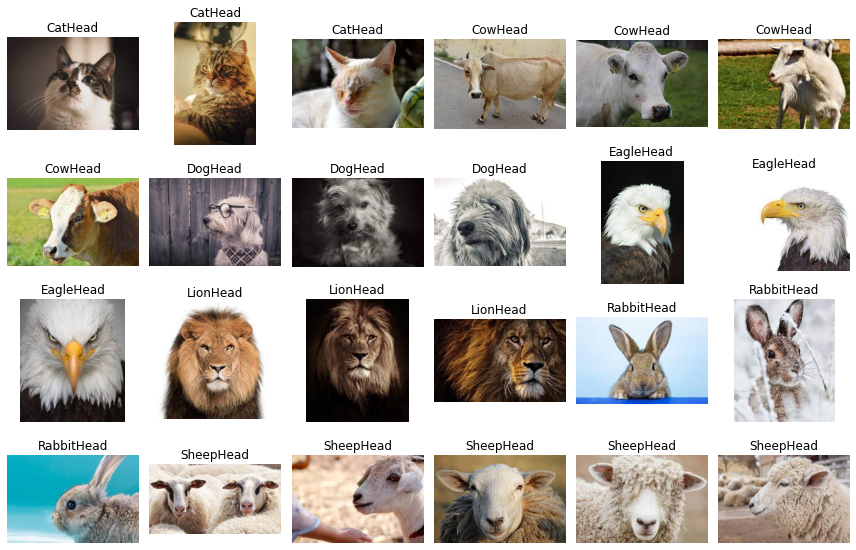

In [21]:
n = 4  
m = 6 


num_images = n * m


indices = list(range(0, num_images))


fig, axs = plt.subplots(n, m, figsize=(12, 8))


for i, index in enumerate(indices):

    row = i // m
    col = i % m


    image = mpimg.imread(new_image_paths[index])
    axs[row, col].imshow(image)
    axs[row, col].axis('off')
    axs[row, col].set_title(new_labels[index])
    
    #axs[row, col].text(0.05, 0.95, labels[index], transform=axs[row, col].transAxes,
    #                   color='white', fontsize=12, fontweight='bold',
    #                   verticalalignment='top', bbox={'facecolor': 'black', 'alpha': 0.8})

plt.tight_layout()
    

plt.show()

In [22]:
new_X_test = []
for new_img_path in new_image_paths:
    image = Image.open(new_img_path)

    image = image.convert("L")

    image = image.resize((300, 300))
    
    image_array = np.array(image, dtype=object)


    feature_vector = image_array.flatten()
    
    new_X_test.append(feature_vector)

In [28]:
with open('best_model2.pkl', 'rb') as file:
    loaded_model2 = pickle.load(file)
    
predictions = loaded_model2.predict(new_X_test)

#print(predictions)

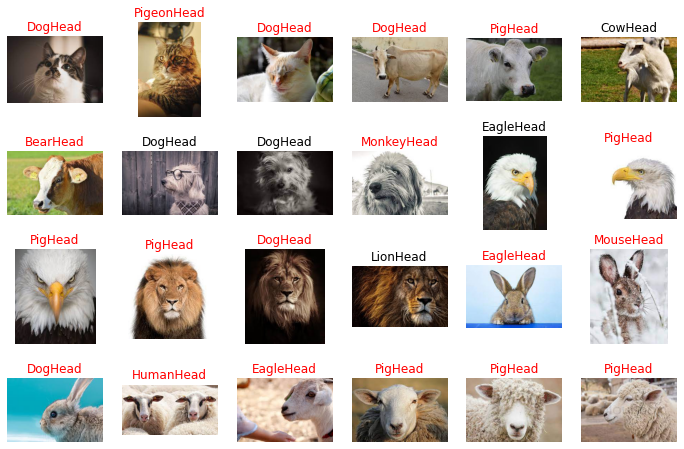

In [29]:
n = 4  
m = 6  


num_images = n * m


indices = list(range(0, num_images))

fig, axs = plt.subplots(n, m, figsize=(12, 8))

for i, index in enumerate(indices):

    row = i // m
    col = i % m
  
    image = mpimg.imread(new_image_paths[index])
    axs[row, col].imshow(image)
    axs[row, col].axis('off')
    #axs.set(xticks=[], yticks=[])
    #axs.set_ylabel(labels_names[yfit[i]].split()[-1],
    axs[row, col].set_title(predictions[index],
        color='black' if predictions[index] == new_labels[index] else 'red')

In [31]:
new_model2 = SVC(C=loaded_model2.C, kernel=loaded_model2.kernel, gamma=loaded_model2.gamma)

In [32]:
new_model2.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [33]:
with open('new_best_model.pkl', 'wb') as file:
    pickle.dump(new_model, file)

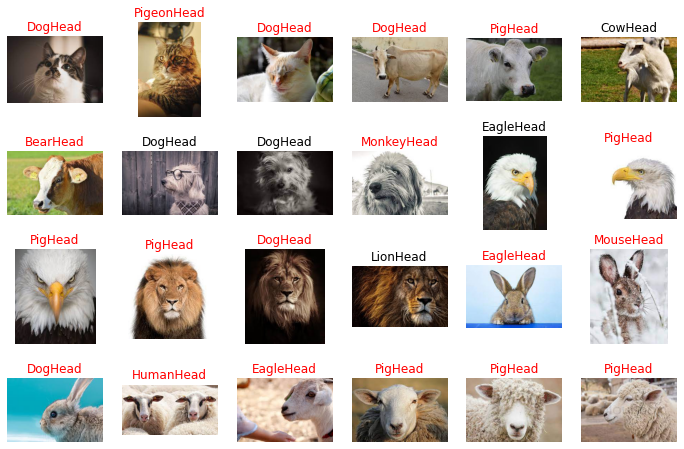

In [34]:
new_predictions = new_model.predict(new_X_test)

n = 4  
m = 6 


num_images = n * m


indices = list(range(0, num_images))

fig, axs = plt.subplots(n, m, figsize=(12, 8))

for i, index in enumerate(indices):

    row = i // m
    col = i % m
  
    image = mpimg.imread(new_image_paths[index])
    axs[row, col].imshow(image)
    axs[row, col].axis('off')
    #axs.set(xticks=[], yticks=[])
    #axs.set_ylabel(labels_names[yfit[i]].split()[-1],
    axs[row, col].set_title(new_predictions[index],
        color='black' if new_predictions[index] == new_labels[index] else 'red')

# CNN model

In [259]:
image_dir = 'C:/Users/feran/Downloads/AnimalFace/Image'  
label_map = {}

In [260]:
images = []
labels = []

for label_idx, label_name in enumerate(os.listdir(image_dir)):
    label_map[label_name] = label_idx
    label_dir = os.path.join(image_dir, label_name)
    for filename in os.listdir(label_dir):
        image_path = os.path.join(label_dir, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image: {image_path}")
            continue
        image = cv2.resize(image, (200, 200))
        images.append(image)
        labels.append(label_idx)

Error loading image: C:/Users/feran/Downloads/AnimalFace/Image\CowHead\cow1.gif


In [261]:
images = np.array(images)
labels = np.array(labels)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [267]:
# Normalize pixel values to a range of 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [268]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [269]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
61/61 [==============================] - 229s 4s/step - loss: 2.9757 - accuracy: 0.1550 - val_loss: 2.9532 - val_accuracy: 0.1591
Epoch 2/10
61/61 [==============================] - 226s 4s/step - loss: 2.9490 - accuracy: 0.1612 - val_loss: 2.9449 - val_accuracy: 0.1591
Epoch 3/10
61/61 [==============================] - 225s 4s/step - loss: 2.9372 - accuracy: 0.1612 - val_loss: 2.9202 - val_accuracy: 0.1591
Epoch 4/10
61/61 [==============================] - 223s 4s/step - loss: 2.9280 - accuracy: 0.1612 - val_loss: 2.9215 - val_accuracy: 0.1591
Epoch 5/10
61/61 [==============================] - 224s 4s/step - loss: 2.9270 - accuracy: 0.1612 - val_loss: 2.9243 - val_accuracy: 0.1591
Epoch 6/10
61/61 [==============================] - 228s 4s/step - loss: 2.8737 - accuracy: 0.1721 - val_loss: 2.9031 - val_accuracy: 0.1653
Epoch 7/10
61/61 [==============================] - 254s 4s/step - loss: 2.7153 - accuracy: 0.2109 - val_loss: 2.6000 - val_accuracy: 0.2190
Epoch 8/10
61

In [270]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Loss:', test_loss)
print('\nTest accuracy:', test_acc)

16/16 - 19s - loss: 2.4070 - accuracy: 0.2893 - 19s/epoch - 1s/step
Test Loss: 2.4069504737854004

Test accuracy: 0.28925618529319763


In [271]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)

16/16 [==============================] - 20s 1s/step


In [291]:
#predictions[0]
#np.argmax(predictions[0])
#y_test[0]
#len(y_test)

In [297]:
class_names = ['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 
               'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 
               'PigHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    #print(predicted_label)
    newtrue_label = np.argmax(true_label)
    #print(newtrue_label)
    if predicted_label == newtrue_label:
         color = 'blue'
    else:
         color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[newtrue_label]),
                                color=color)
    


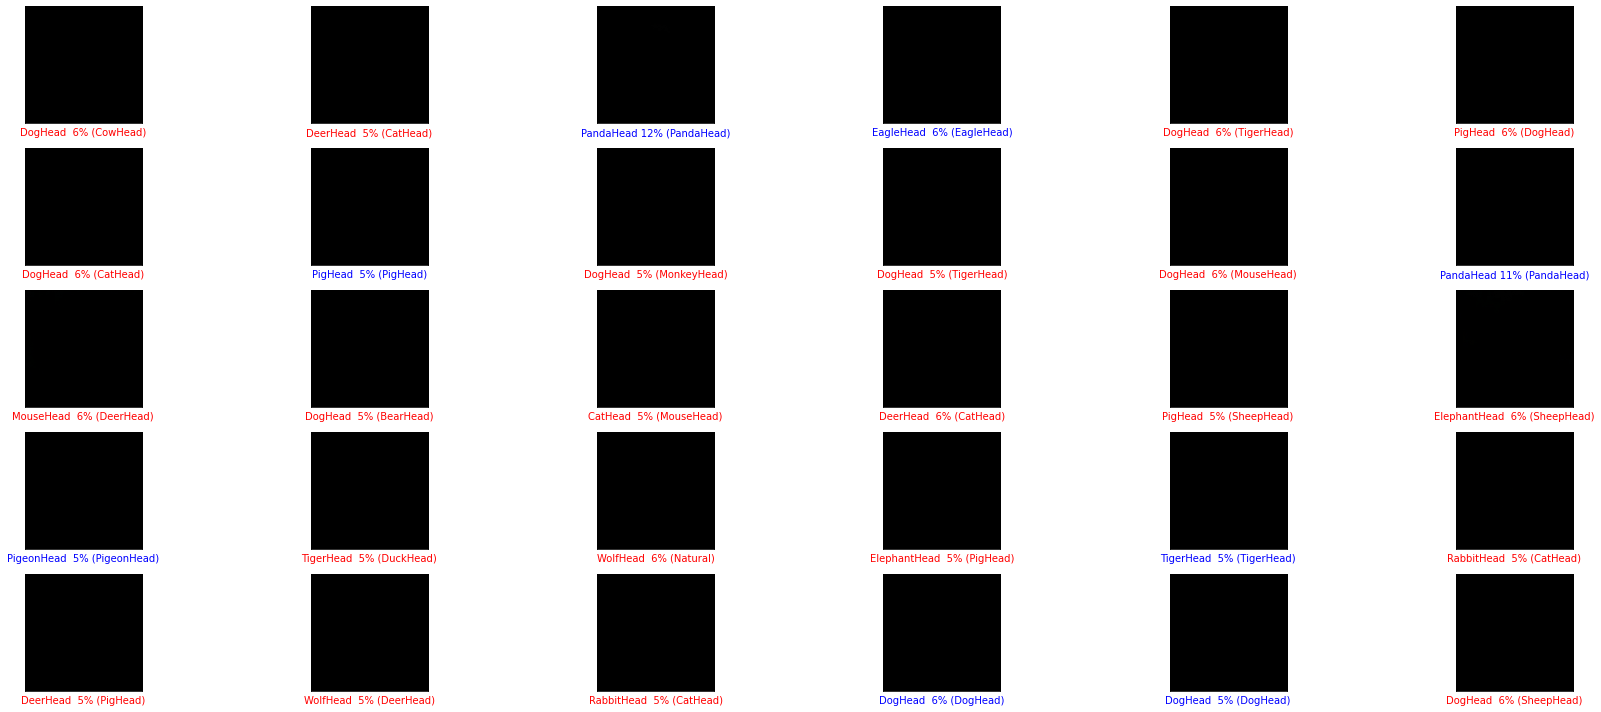

In [298]:
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
plt.tight_layout()
plt.show()

